In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt

use_gpu = True if torch.cuda.is_available() else False

In [23]:
def load_model(model_name, use_gpu=use_gpu):
  if model_name == 'DCGAN':
    model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub', 'DCGAN', pretrained=True, useGPU=use_gpu)
  elif model_name == "PGAN":
    model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=use_gpu)
  else:
    raise Exception('No model found')
  return model

def display_images(images):
  images = (images - images.min()) / (images.max() - images.min()) # normalize the image

  grid_image = torchvision.utils.make_grid(images).permute(1,2,0).cpu().numpy() # make the grid of images, move to cpu and transforme in numpy array
  plt.imshow(grid_image)
  plt.axis('off')
  plt.show()


In [29]:
def main(model_name, n_images):
  TOTAL_IMAGES = n_images

  model = load_model(model_name ,use_gpu)
  noise, _ = model.buildNoiseData(TOTAL_IMAGES)

  with torch.no_grad():
    images = model.test(noise)

  display_images(images)

Using cache found in /root/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


Average network found !


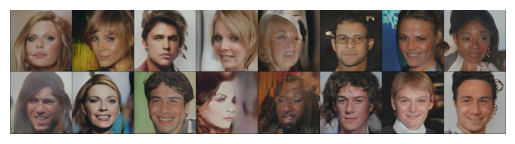

In [30]:
main("PGAN", 16)